In [1]:
from env import *
from fonctions import *
import numpy as np

In [2]:
env = Env(10,10,0.6,0.2,[0.1,0.2,0.3,0.4])

In [3]:
cases=env.reset()

In [4]:
cases[:,:,0]

array([[1, 2, 4, 4, 0, 0, 0, 1, 2, 0],
       [3, 0, 3, 3, 4, 1, 2, 3, 4, 3],
       [1, 3, 3, 4, 4, 2, 0, 4, 4, 2],
       [0, 2, 3, 3, 0, 4, 4, 4, 4, 2],
       [0, 2, 3, 2, 0, 2, 0, 2, 3, 4],
       [0, 2, 0, 0, 0, 2, 0, 3, 2, 0],
       [2, 4, 3, 2, 4, 0, 3, 3, 3, 3],
       [3, 4, 1, 1, 4, 1, 2, 2, 2, 0],
       [4, 0, 4, 0, 3, 4, 2, 4, 2, 3],
       [2, 3, 3, 0, 0, 0, 4, 0, 3, 3]])

In [5]:
env.reward

array([[  -1,   -2,   -4,   -4,    0,    0,    0,   -1,   -2,    0],
       [  -3,    0,   -3,   -3,   -4,   -1,   -2,   -3,   -4,   -3],
       [  -1,   -3,   -3,   -4,   -4,   -2,    0,   -4,   -4,   -2],
       [   0,   -2,   -3,   -3,    0,   -4,   -4,   -4,   -4,   -2],
       [   0,   -2,   -3,   -2,    0,   -2,    0,   -2,   -3,   -4],
       [   0,   -2,    0,    0,    0,   -2,    0,   -3,   -2,    0],
       [  -2,   -4,   -3,   -2,   -4,    0,   -3,   -3,   -3,   -3],
       [  -3,   -4,   -1,   -1,   -4,   -1,   -2,   -2,   -2,    0],
       [  -4,    0,   -4,    0,   -3,   -4,   -2,   -4,   -2,   -3],
       [  -2,   -3,   -3,    0,    0,    0,   -4,    0,   -3, 1000]])

In [6]:
nb,v,policy=value_iteration(env,0.9,max_iteration=2000)

In [7]:
dict_action={0:"O",1:"S",2:"W",3:"E"}

In [8]:
policy

array([[3., 3., 3., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 3., 3., 3., 1., 3., 1., 1., 1.],
       [3., 1., 3., 3., 3., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 0., 3., 3., 1., 1., 1.],
       [0., 1., 2., 2., 0., 0., 0., 1., 1., 2.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [3., 3., 3., 3., 1., 0., 1., 1., 1., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 1., 0.],
       [0., 0., 0., 0., 3., 3., 3., 3., 1., 1.],
       [0., 3., 0., 0., 0., 0., 0., 0., 3., 0.]])

In [9]:
v

array([[158.39302117, 178.21465176, 198.50251585, 219.03048849,
          0.        ,   0.        ,   0.        , 319.68625389,
        324.99201012,   0.        ],
       [175.46783245,   0.        , 217.18272229, 247.78100499,
        274.08812026, 297.21392809, 326.68861141, 366.5852064 ,
        366.25718004, 360.15442088],
       [192.82982701, 211.28054377, 222.40272662, 263.08609778,
        302.43088404, 340.52273477,   0.        , 411.05041265,
        414.6050516 , 399.89654388],
       [  0.        , 241.71048017, 219.16120639, 218.53146077,
          0.        , 373.61166823, 419.56852026, 472.08528861,
        470.01123976, 441.24238989],
       [  0.        , 277.03593994, 246.9144793 , 214.22742345,
          0.        , 332.2505014 ,   0.        , 523.62994521,
        540.3984892 , 483.0148081 ],
       [  0.        , 310.03993368,   0.        ,   0.        ,
          0.        , 297.02545123,   0.        , 578.93381172,
        608.87555985,   0.        ],
       [30

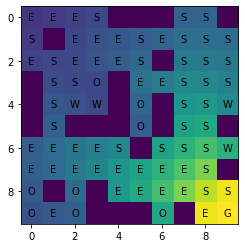

In [10]:
visu_policy(v,policy,dict_action,cases)

In [11]:
import gurobipy as gp
from gurobipy import GRB

In [21]:
def dual_pl_mono(env,gamma):
	nblignes,nbColonnes = env.state_space
	state = env.cases[:,:,0]

	m = gp.Model()
	m.setParam("OutputFlag",False)
	x_s_a = m.addVars(np.arange(nblignes),np.arange(nbColonnes),env.action_space,name="x_s_a")




	obj = gp.LinExpr()

	for i in range(nblignes):
		for j in range(nbColonnes):
			if not(env.cases[i,j,0]==0):
				if not(i==nblignes-1 and j==nbColonnes-1):
					for a in env.action_space:
						next_state, proba_transition = env.step(i,j,a)
						R = [env.reward[s] for s in next_state]
						Rs = np.sum(np.array(R)*np.array(proba_transition))
						obj += x_s_a[(i,j,a)]*Rs

				expr1 = gp.LinExpr()
				for a in env.action_space:
					expr1 += x_s_a[(i,j,a)]

				last_state = env.step_back(i+1,j+1)
				expr2 = gp.LinExpr()
				for l in range(last_state.shape[1]):
					_s_x,_s_y = last_state[:,l]
					if env.cases[_s_x,_s_y,0]>0 and not(_s_x==nblignes-1 and _s_y==nbColonnes-1):
						for a in env.action_space:
							next_state,proba_transition = env.step(_s_x,_s_y,a)
							if (i,j) in next_state:
								index = next_state.index((i,j))
								#print(proba_transition)
								#print(index)
								proba = proba_transition[index]
								expr2.add(x_s_a[(_s_x,_s_y,a)],proba)
				m.addConstr(expr1-gamma*expr2==1)
	m.setObjective(obj,GRB.MAXIMIZE)
	m.optimize()

	for v in m.getVars():
			print(v.Varname,v.x)

In [22]:
dual_pl_mono(env,0.9)

x_s_a[0,0,up] 0.0
x_s_a[0,0,down] 0.0
x_s_a[0,0,left] 0.0
x_s_a[0,0,right] 1.0
x_s_a[0,1,up] 0.0
x_s_a[0,1,down] 0.0
x_s_a[0,1,left] 0.0
x_s_a[0,1,right] 1.9
x_s_a[0,2,up] 0.0
x_s_a[0,2,down] 0.0
x_s_a[0,2,left] 0.0
x_s_a[0,2,right] 2.3680000000000003
x_s_a[0,3,up] 0.0
x_s_a[0,3,down] 3.04518396031418
x_s_a[0,3,left] 0.0
x_s_a[0,3,right] 0.0
x_s_a[0,4,up] 0.0
x_s_a[0,4,down] 0.0
x_s_a[0,4,left] 0.0
x_s_a[0,4,right] 0.0
x_s_a[0,5,up] 0.0
x_s_a[0,5,down] 0.0
x_s_a[0,5,left] 0.0
x_s_a[0,5,right] 0.0
x_s_a[0,6,up] 0.0
x_s_a[0,6,down] 0.0
x_s_a[0,6,left] 0.0
x_s_a[0,6,right] 0.0
x_s_a[0,7,up] 0.0
x_s_a[0,7,down] 1.2195121951219512
x_s_a[0,7,left] 0.0
x_s_a[0,7,right] 0.0
x_s_a[0,8,up] 0.0
x_s_a[0,8,down] 1.0
x_s_a[0,8,left] 0.0
x_s_a[0,8,right] 0.0
x_s_a[0,9,up] 0.0
x_s_a[0,9,down] 0.0
x_s_a[0,9,left] 0.0
x_s_a[0,9,right] 0.0
x_s_a[1,0,up] 0.0
x_s_a[1,0,down] 1.0
x_s_a[1,0,left] 0.0
x_s_a[1,0,right] 0.0
x_s_a[1,1,up] 0.0
x_s_a[1,1,down] 0.0
x_s_a[1,1,left] 0.0
x_s_a[1,1,right] 0.0
x_s_a[1,2